<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Google-Colab" data-toc-modified-id="Google-Colab-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google Colab</a></span></li></ul></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Class-distribution" data-toc-modified-id="Class-distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Class distribution</a></span></li><li><span><a href="#Text-Preparation-for-Spacy" data-toc-modified-id="Text-Preparation-for-Spacy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Text Preparation for Spacy</a></span></li><li><span><a href="#Classifying-text-into-categories-using-Spacy" data-toc-modified-id="Classifying-text-into-categories-using-Spacy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Classifying text into categories using Spacy</a></span></li><li><span><a href="#Named-Entity-Recognition" data-toc-modified-id="Named-Entity-Recognition-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Named Entity Recognition</a></span></li><li><span><a href="#Chunking" data-toc-modified-id="Chunking-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Chunking</a></span></li><li><span><a href="#Dependency-Parsing" data-toc-modified-id="Dependency-Parsing-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Dependency Parsing</a></span></li><li><span><a href="#Verb-Phrase-Detection" data-toc-modified-id="Verb-Phrase-Detection-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Verb Phrase Detection</a></span></li><li><span><a href="#Rule-Based-Matching-Using-spaCy" data-toc-modified-id="Rule-Based-Matching-Using-spaCy-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Rule-Based Matching Using spaCy</a></span></li><li><span><a href="#Word-vectors-and-similarity" data-toc-modified-id="Word-vectors-and-similarity-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Word vectors and similarity</a></span></li><li><span><a href="#Pipeline-components" data-toc-modified-id="Pipeline-components-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Pipeline components</a></span></li><li><span><a href="#Time-Taken" data-toc-modified-id="Time-Taken-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Time Taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction
[Data Description](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)


You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:
```
toxic
severe_toxic
obscene
threat
insult
identity_hate
```
You must create a model which predicts a probability of each type of toxicity for each comment.


References:
- https://spacy.io/usage

```python
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download en_core_web_sm
```

# Imports

In [1]:
import time

time_start_notebook = time.time()

## Google Colab

In [2]:
%%capture
ENV_BHISHAN = None

try:
    import bhishan
    ENV_BHISHAN = True
    print("Environment: Bhishan's Laptop")
except:
    pass


import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    # load google drive
    # from google.colab import drive
    # drive.mount('/content/drive')
    # dat_dir = 'drive/My Drive/Colab Notebooks/data/' 
    # sys.path.append(dat_dir)
    
    # pip install
    #!pip install pyldavis
    #!pip install hyperopt
    # !pip install catboost
    #!pip install shap
    #!pip install eli5
    #!pip install lime
    # !pip install category_encoders # TargetEncoder
    # !pip install loguru

    # nlp
    !pip install textacy
    !python -m spacy download en_core_web_sm # nlp = spacy.load("en_core_web_sm")

    # update modules
    # !pip install -U pandas
    # !pip install -U scikit-learn
    # !pip install -U tqdm # tqdm needs restart run time.

    # print
    print('Environment: Google Colaboratory.')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED=100
np.random.seed(SEED)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 500)

import IPython
from IPython.display import display, HTML, Image, Markdown

import re
import string # string.punctuation
from string import digits

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import scipy

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, ClassifierMixin

# text features
from sklearn.feature_extraction.text import TfidfVectorizer

# classifiers
from sklearn.linear_model import LogisticRegression

# model selection
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# text processing
import spacy
import en_core_web_sm

%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/poudel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/poudel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/poudel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Author: Bhishan Poudel

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit


seaborn       : 0.11.0
nltk          : 3.5
en_core_web_sm: 3.1.0
scipy         : 1.2.1
IPython       : 7.19.0
sys           : 3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]
pandas        : 1.1.4
matplotlib    : 3.2.2
re            : 2.2.1
spacy         : 3.1.2
numpy         : 1.19.4



In [4]:
# my local library
import sys, os
sys.path.append(os.path.expanduser("~/Dropbox/a00_Bhishan_Modules/bhishan"))
import bhishan
from bhishan import bp

# Load the Data

In [5]:
ifile1_train = '../data/raw/train.csv.zip'
ifile2_train = 'https://github.com/bhishanpdl/Project_Toxic_Comments/blob/master/data/raw/train.csv?raw=true'

ifile1_test = '../data/raw/test.csv.zip'
ifile2_test = 'https://github.com/bhishanpdl/Project_Toxic_Comments/blob/master/data/raw/test.csv?raw=true'


if ENV_COLAB:
    df_raw_train = pd.read_csv(ifile2_train)
    df_raw_test = pd.read_csv(ifile2_test)
else:
    df_raw_train = pd.read_csv(ifile1_train)
    df_raw_test = pd.read_csv(ifile1_test)

df_train = df_raw_train.copy()
df_test = df_raw_test.copy()

print(df_train.shape)
df_train.head()

(127656, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,8d603d50affa1126,"""\nYes, aside, thank you for trying to answer the block-related concerns. I will accept your stated goal, """"to answer your questions, to help clear up points of confusion"""", as answer to my #1 above and my italicized rephrasal (i.e., the negotiation of our communicative relationship). I only ask that if you should for any reason decide to assume bad faith with me, please have the courtesy of quoting (not linking) a significant clause or sentence (not title) of a policy. Thank you. I also acc...",0,0,0,0,0,0
1,8fb3576937b9e0d0,"March 2010 (UTC)\n\nThanks! and understood about the Wproject tags. Any advice on how to better the format of the references? I am not quite au fait with this although I have done some referencing in the past. Can you beautify them or advise me? (talk) 23:43, 24",0,0,0,0,0,0
2,379440e04fb68e27,"""\n\n The Outfield \n\nHahaha - compassion is vested considering the er...kind endowment by Kylu emblazoning your page my friend. I will recommend a few songs and two albums; Play Deep and Rockeye being the latter. Both are fairly accomplished works and prove quite fresh even today: Songs wise I can certainly recommend """"Your Love"""", """"Say It isn't so"""", also """"Winning it all"""", """"Closer to me"""" with """"Tonight your mine"""". Also - welcome to Wikipedia! We do not get many persons from Cuba her...",0,0,0,0,0,0
3,6be4446aac8ae028,Opposition is a source of strength. I believe al-Sistani said that...,0,0,0,0,0,0
4,1a2ff7ed958506a3,"Please discontinue making those unsupported changes to the T line and the subway car rosters. All you will accomplish is seeing your chagges reveretd back to the previous correct version.\n\nIf you have confirmable doucmentation, supply it.",0,0,0,0,0,0


In [6]:
print(df_test.shape)
df_test.head()

(31915, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,70bbc3e96dd459b1,"Hammed it is, cheers!",0,0,0,0,0,0
1,0b2e86f819b4b9a4,"Not a problem, sorry for the inconvenience and thank you for the notification and correction.",0,0,0,0,0,0
2,fb7a63a8e287b2d1,"Sources for Gambia at the 2000 Summer Olympics (\nHello, good work on Gambia at the 2000 Summer Olympics (, and thanks for the contribution. However, you forgot to add any references to the article. Keeping Wikipedia accurate and verifiable is very important, and there is currently a push to encourage editors to cite the sources they used when adding content. What websites, books, or other places did you learn the information that you added to Gambia at the 2000 Summer Olympics (? Would it b...",0,0,0,0,0,0
3,72beff75685cb8dc,Added some criticism \n\nI added some much needed criticism.,0,0,0,0,0,0
4,f7c526a05d03f697,"Who cares? It's just a song, it's a great song, but it's still just a song.",0,0,0,0,0,0


In [7]:
df_train['clean'] = df_train.loc[:,'toxic':'identity_hate'].sum(axis=1) == 0

print(df_train['clean'].sum())

df_train.head(2)

114719


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,8d603d50affa1126,"""\nYes, aside, thank you for trying to answer the block-related concerns. I will accept your stated goal, """"to answer your questions, to help clear up points of confusion"""", as answer to my #1 above and my italicized rephrasal (i.e., the negotiation of our communicative relationship). I only ask that if you should for any reason decide to assume bad faith with me, please have the courtesy of quoting (not linking) a significant clause or sentence (not title) of a policy. Thank you. I also acc...",0,0,0,0,0,0,True
1,8fb3576937b9e0d0,"March 2010 (UTC)\n\nThanks! and understood about the Wproject tags. Any advice on how to better the format of the references? I am not quite au fait with this although I have done some referencing in the past. Can you beautify them or advise me? (talk) 23:43, 24",0,0,0,0,0,0,True


# Class distribution

In [8]:
ser_sum = df_train.iloc[:,2:].sum(axis=0)
ser_sum

toxic             12202
severe_toxic       1282
obscene            6782
threat              379
insult             6292
identity_hate      1136
clean            114719
dtype: int64

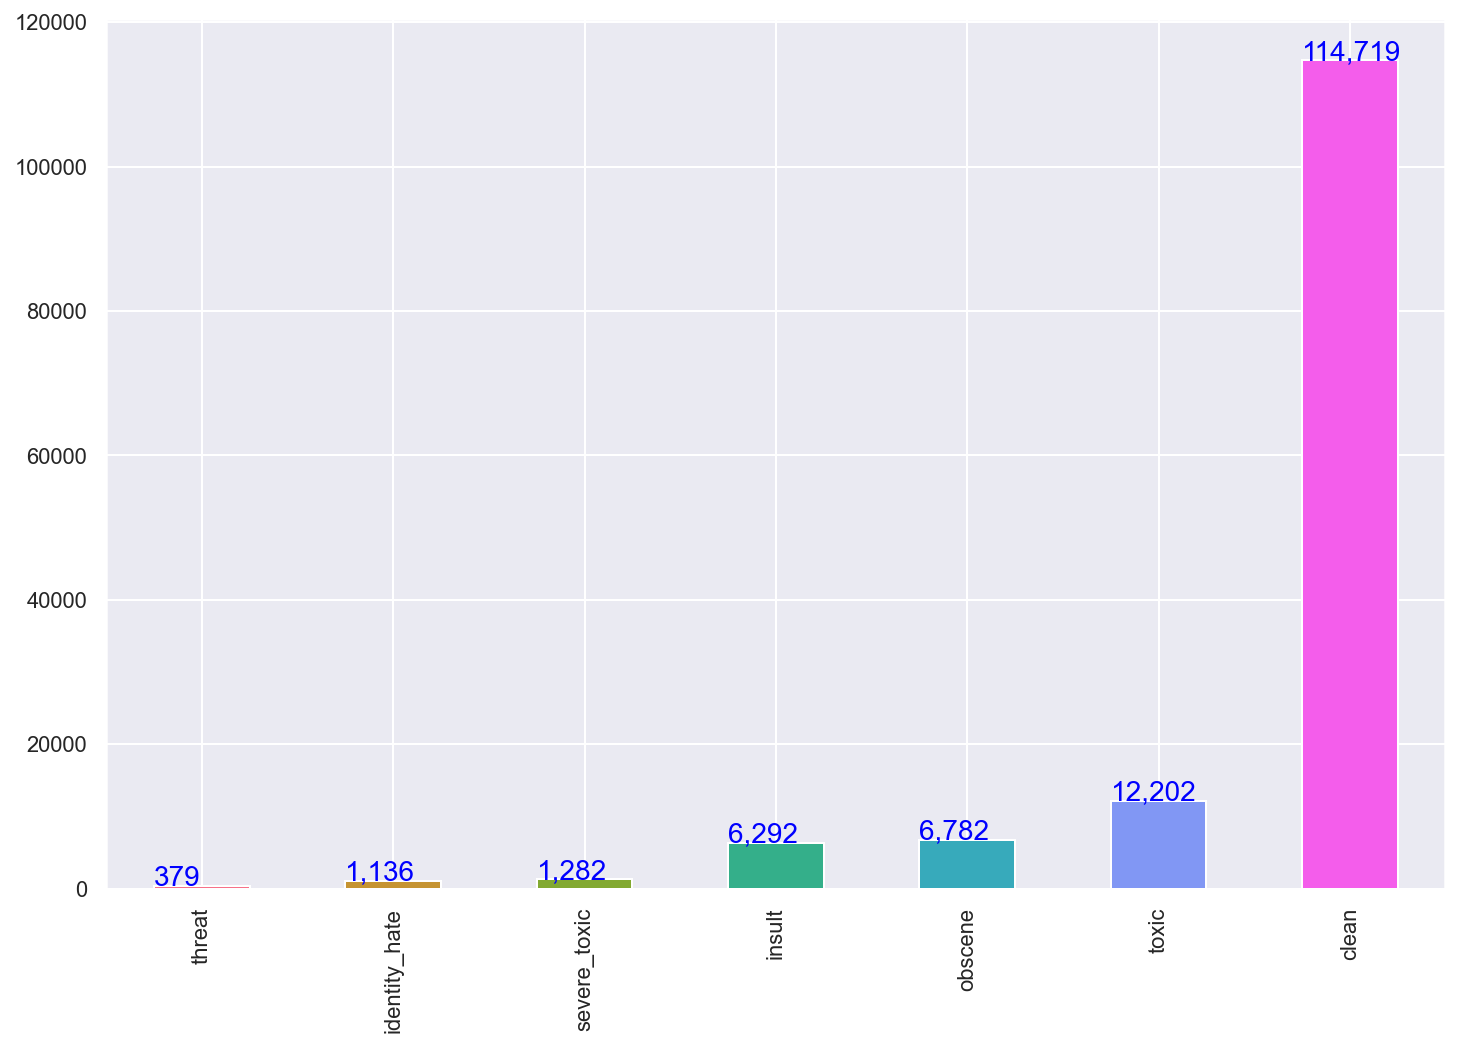

In [9]:
ax = ser_sum.sort_values().plot.bar(color=sns.color_palette('husl',len(ser_sum)))

for p in ax.patches:
    x,y = p.get_x(), p.get_height()
    ax.text(x,y,f'{y:,.0f}',fontsize=14,color='blue')

# Text Preparation for Spacy

In [10]:
df_train['text'] = df_train['comment_text'].apply(lambda x: x.replace('\n', ' '))

In [11]:
cats = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

lst_train_prepared = []

def format_text_spacy(text):
    return (text.text, {'cats': {cat: text[cat] for cat in cats}})
    
for i in range(0,len(df_train)):
    text = df_train.iloc[i]
    lst_train_prepared.append(format_text_spacy(text))

In [12]:
# lst_train_prepared[0:3]

# Classifying text into categories using Spacy
- https://spacy.io/usage/processing-pipelines

In [13]:
import random
import spacy
import time
from spacy.util import minibatch, compounding
import en_core_web_sm

In [14]:
bp.show_methods(spacy,5)

,0,1,2,3,4
0,Config,displacy,lexeme,pipeline,strings
1,Errors,errors,load,prefer_gpu,symbols
2,Language,explain,logger,registry,tokenizer
3,Vocab,git_info,lookups,require_cpu,tokens
4,about,glossary,matcher,require_gpu,training
5,attrs,info,ml,schemas,util
6,blank,kb,morphology,scorer,vectors
7,cli,lang,parts_of_speech,setup_default_warnings,vocab
8,compat,language,pipe_analysis,,


In [15]:
bp.show_methods(spacy.util,5)

,0,1,2,3,4
0,Adam,SpecifierSet,expand_exc,import_file,make_tempdir
1,CONFIG_SECTION_ORDER,Version,filter_spans,importlib_metadata,minibatch
2,Config,Warnings,fix_random_seed,is_compatible_version,minify_html
3,ConfigValidationError,about,from_bytes,is_cwd,normalize_slice
4,CudaStream,add_lookups,from_dict,is_cython_func,packages_distributions
5,DEFAULT_OOV_PROB,catalogue,from_disk,is_in_jupyter,raise_error
6,DummyTokenizer,check_bool_env_var,get_arg_names,is_minor_version_match,read_regex
7,ENV_VARS,check_lexeme_norms,get_async,is_package,registry
8,Errors,combine_score_weights,get_base_version,is_same_func,replace_model_node
9,InvalidSpecifier,compile_infix_regex,get_cuda_stream,is_unconstrained_version,resolve_dot_names


In [16]:
nlp.add_pipe?

Object `nlp.add_pipe` not found.


In [17]:
time_start = time.time()

# nlp = spacy.load('en_core_web_lg')
nlp = spacy.load('en_core_web_sm')



In [18]:
# for spacy2.0
# # creat textcat
# textcat = nlp.create_pipe('textcat')
# textcat = nlp.create_pipe(
#               "textcat",
#               config={
#                 "exclusive_classes": True,
#                 "architecture": "bow"})
# we also add labels later using textcat.add_label

# # add this to pipe
# nlp.add_pipe(textcat, last=True)

# # add label
# for cat in cats:
#     textcat.add_label(cat)

In [19]:
bp.show_methods(nlp,5)

,0,1,2,3,4
0,Defaults,default_config,from_disk,meta,replace_pipe
1,add_pipe,default_error_handler,get_factory_meta,path,resume_training
2,analyze_pipes,disable_pipe,get_factory_name,pipe,select_pipes
3,batch_size,disable_pipes,get_pipe,pipe_factories,set_error_handler
4,begin_training,disabled,get_pipe_config,pipe_labels,set_factory_meta
5,component,enable_pipe,get_pipe_meta,pipe_names,to_bytes
6,component_names,evaluate,has_factory,pipeline,to_disk
7,components,factories,has_pipe,rehearse,tokenizer
8,config,factory,initialize,remove_pipe,update
9,create_optimizer,factory_names,lang,rename_pipe,use_params


In [20]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [21]:
# Add pipeline for TextCategorizer
if 'textcat_multilabel' not in nlp.pipe_names:
    nlp.add_pipe('textcat_multilabel', last=True)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'textcat_multilabel']

In [ ]:
# # add label (spacy2.0)
# labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# for label in labels:
#     textcat.add_label(cat)

In [23]:
# other pipes
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat_multilabel']

# train only textcat
with nlp.disable_pipes(*other_pipes):
    nlp.initialize()
    for i in range(1):
        losses = {}
        batches = minibatch(lst_train_prepared[0:10000], size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, drop=0.2, losses=losses)

time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

ValueError: [E143] Labels for component 'textcat_multilabel' not initialized. This can be fixed by calling add_label, or by providing a representative batch of examples to the component's `initialize` method.

# Named Entity Recognition

In [ ]:
from spacy import displacy

In [ ]:
doc = nlp(mytext)    

In [ ]:
displacy.render(doc, style='ent', jupyter=True)

# Chunking

In [ ]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.label_, chunk.root.text)

# Dependency Parsing

In [ ]:
# for token in doc:
#     print("{0}/{1} <--{2}-- {3}/{4}".format(
#         token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

In [ ]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

# Verb Phrase Detection

In [ ]:
import textacy

In [ ]:
pattern = r'(<VERB>?<ADV>*<VERB>+)'
doc = textacy.make_spacy_doc(mytext,lang='en_core_web_sm')

verb_phrases = textacy.extract.pos_regex_matches(doc, pattern)

# Print all Verb Phrase
for chunk in verb_phrases:
    print(chunk.text)


# Extract Noun Phrase to explain what nouns are involved
for chunk in doc.noun_chunks:
    print (chunk)

# Rule-Based Matching Using spaCy

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_full_name(nlp_doc):
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    matcher.add('FULL_NAME', None, pattern)
    matches = matcher(nlp_doc)
    for match_id, start, end in matches:
        span = nlp_doc[start:end]
        return span.text

extract_full_name(doc)

# Word vectors and similarity

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc1 = nlp("I like cats")
doc2 = nlp("I like dogs")
# Compare 2 documents
doc1.similarity(doc2)
# Compare 2 tokens
doc1[2].similarity(doc2[2])
# Compare tokens and spans
doc1[0].similarity(doc2[1:3])

In [ ]:
# Vector as a numpy array
doc = nlp("I like cats")
# The L2 norm of the token's vector
doc[2].vector
doc[2].vector_norm

# Pipeline components

In [ ]:
nlp.pipe_names
# ['tagger', 'parser', 'ner']
nlp.pipeline
# [('tagger', <spacy.pipeline.Tagger>),
# ('parser', <spacy.pipeline.DependencyParser>),
# ('ner', <spacy.pipeline.EntityRecognizer>)]

# Time Taken 

In [ ]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))